# Первый подход. Построение VAR-модели

In [1]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 3.6.3"


In [2]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
library(vars)

Warning message:
"package 'vars' was built under R version 3.6.3"
Loading required package: MASS

Warning message:
"package 'MASS' was built under R version 3.6.3"
Loading required package: strucchange

Warning message:
"package 'strucchange' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 3.6.3"
Loading required package: urca

Warning message:
"package 'urca' was built under R version 3.6.3"
Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 3.6.3"


In [4]:
prod <- read_excel('prod.xlsx')

New names:
* `` -> ...1
* `` -> ...2



In [5]:
head(prod)

...1,...2,Российская Федерация,Центральный федеральный округ,Северо-Западный федеральный округ,Южный федеральный округ (с 2010 года),Северо-Кавказский федеральный округ,Приволжский федеральный округ,Уральский федеральный округ,Сибирский федеральный округ,Дальневосточный федеральный округ
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,январь,23633.50,4643.72,6157.86,2859.66,51.5,8121.08,676.87,1120.35,2.46
2010,февраль,29356.62,5109.21,6458.86,3965.21,51.3,11489.80,869.32,1405.82,7.10
2010,март,33110.96,6135.16,6398.24,3289.99,56.0,14390.25,1078.76,1754.36,8.20
2010,апрель,37564.98,5379.90,7486.37,4439.62,52.7,17546.26,853.28,1797.31,9.54
2010,май,39503.23,4743.13,7788.25,4577.10,63.8,19384.14,1297.97,1640.39,8.45
2010,июнь,38189.64,5000.94,8064.54,3610.93,50.4,18159.24,1136.43,2158.08,9.08


In [6]:
prod <- prod[,-c(1,2,3)]

In [7]:
prod <- as.ts(prod)

In [8]:
for (i in 1:ncol(prod)) {
t <- adf.test(prod[,i])
print(t$p.value)
}

[1] 0.4945066
[1] 0.02911985
[1] 0.4329351
[1] 0.1602


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01
[1] 0.03011715
[1] 0.2843926
[1] 0.1099476


### Не все ряды стационарны, буду брать лог-доходности 

In [9]:
first_row <- prod[1,]

In [10]:
prod <- diff(log(prod))

In [11]:
head(prod)

Центральный федеральный округ,Северо-Западный федеральный округ,Южный федеральный округ (с 2010 года),Северо-Кавказский федеральный округ,Приволжский федеральный округ,Уральский федеральный округ,Сибирский федеральный округ,Дальневосточный федеральный округ
0.09552902,0.047723517,0.32685608,-0.003891055,0.346996535,0.25023207,0.22697963,1.05993343
0.18299136,-0.009429879,-0.18667429,0.087660939,0.225091209,0.21585622,0.22148336,0.14403937
-0.13136637,0.157061081,0.29968426,-0.060736235,0.198289928,-0.23447977,0.02418698,0.15135933
-0.12597253,0.039532154,0.03049682,0.191137735,0.099614384,0.41946904,-0.09135708,-0.12132704
0.05292864,0.034860486,-0.23710025,-0.235762015,-0.065275684,-0.13290974,0.27428492,0.07190775
0.01690313,-0.031226996,0.10195643,0.348306694,0.000393111,0.06217472,-0.36836444,-0.17006221


In [12]:
for (i in 1:ncol(prod)) {
t <- adf.test(prod[,i])
print(t$p.value)
}

Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


Warning message in adf.test(prod[, i]):
"p-value smaller than printed p-value"


[1] 0.01


### Сделал все ряды стационарными, приступаем к ВАР модели

In [13]:
m1 <- VAR(prod, lag.max = 24)

Warning message in log(sigma.det):
"созданы NaN"
Warning message in log(sigma.det):
"созданы NaN"
Warning message in log(sigma.det):
"созданы NaN"


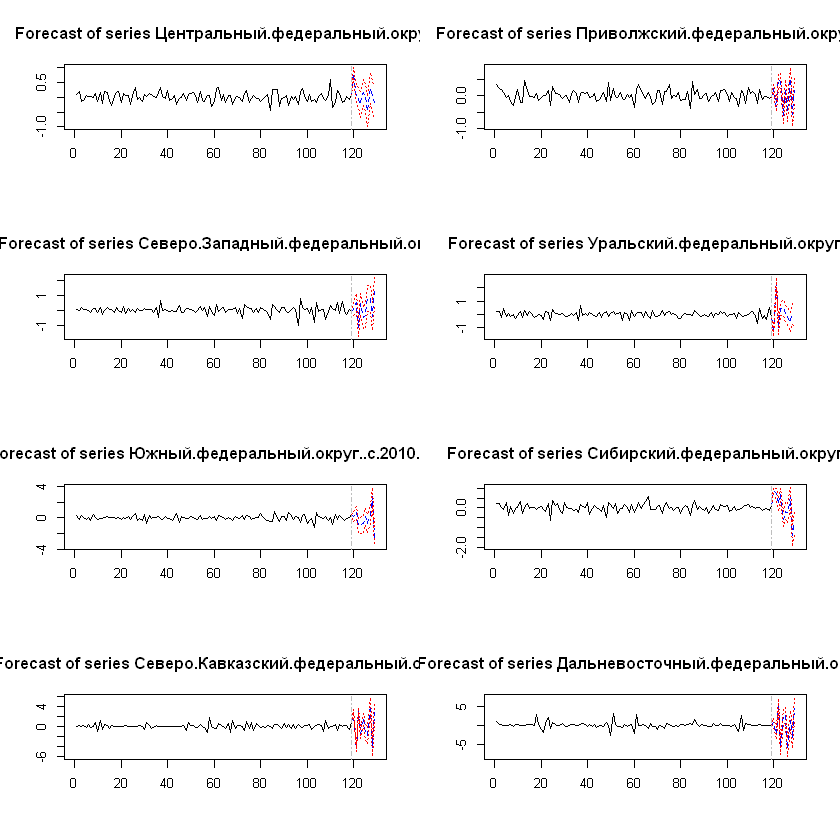

In [14]:
plot(predict(m1))

### Все модели значимы, переведем обратно к абсолютным значениям 

In [16]:
k <- predict(m1)

In [17]:
pred <- cbind(k$fcst$Центральный.федеральный.округ[,1], k$fcst$Северо.Западный.федеральный.округ[,1],
              k$fcst$Южный.федеральный.округ..с.2010.года.[,1], k$fcst$Северо.Кавказский.федеральный.округ[,1],
              k$fcst$Приволжский.федеральный.округ[,1], k$fcst$Уральский.федеральный.округ[,1],
              k$fcst$Сибирский.федеральный.округ[,1], k$fcst$Дальневосточный.федеральный.округ[,1])

In [18]:
prod <- rbind(prod, pred)

In [19]:
prod <- rbind(first_row, prod)

In [20]:
for (i in 2:nrow(prod)) {
prod[i,] <- prod[(i-1),] * exp(prod[i,])
}

In [21]:
total_prod <- rowSums(prod)

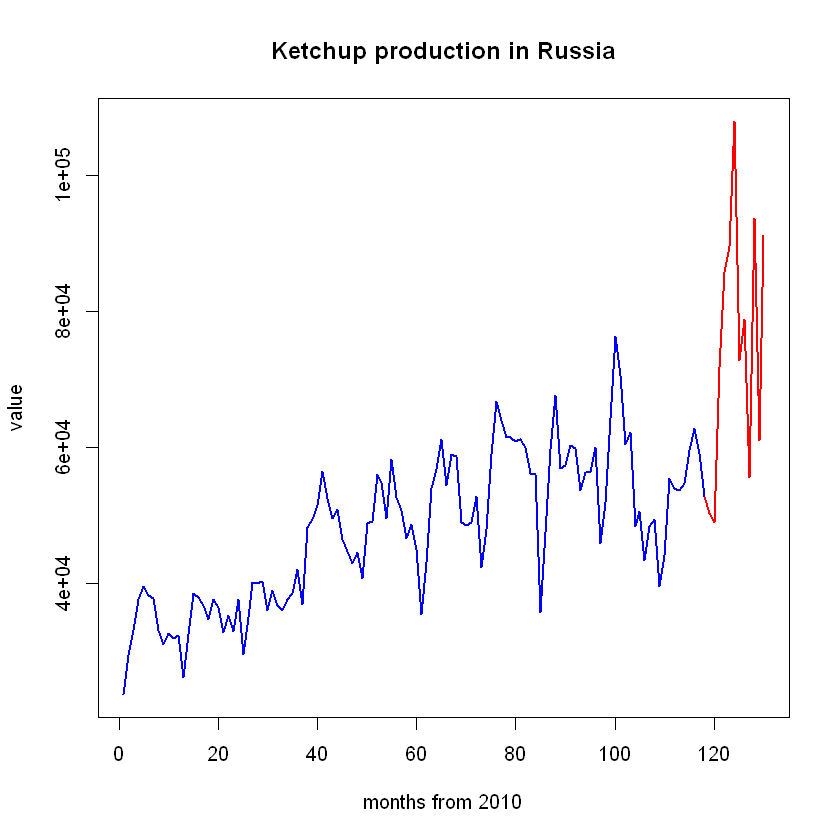

In [22]:
plot(total_prod, t = 'l', lwd = 2, col = 'red', main = 'Ketchup production in Russia', ylab = 'value', xlab = 'months from 2010')
lines(total_prod[1:118] ,lwd = 2, col = 'blue')

#### Результат получилось не очень, ведт такие модели используются обычно для краткосрочных периодов и не учитывают ничего, кроме самих значений. Сама пмодель подразумеваент, что производство в округах влияет друг на друга. Похожие модели используются для прогнозирования макроэкономических показателей, которые впрочем тоже можно было добавить в модель

# Второй подход. ARMA+GARCH

In [23]:
garchAutoTryFit = function(
  ll,
  data,
  trace=FALSE,
  forecast.length=1,
  with.forecast=TRUE,
  ic="AIC",
  garch.model="garch" )
{
  formula = as.formula( paste( sep="",
                               "~ arma(", ll$order[1], ",", ll$order[2], ")+",
                               garch.model,
                               "(", ll$order[3], ",", ll$order[4], ")" ) )
  fit = tryCatch( garchFit( formula=formula,
                            data=data,
                            trace=FALSE,
                            cond.dist=ll$dist ),
                  error=function( err ) TRUE,
                  warning=function( warn ) FALSE )
  
  pp = NULL
  
  if( !is.logical( fit ) ) {
    if( with.forecast ) {
      pp = tryCatch( predict( fit,
                              n.ahead=forecast.length,
                              doplot=FALSE ),
                     error=function( err ) FALSE,
                     warning=function( warn ) FALSE )
      if( is.logical( pp ) ) {
        fit = NULL
      }
    }
  } else {
    fit = NULL
  }
  
  if( trace ) {
    if( is.null( fit ) ) {
      cat( paste( sep="",
                  "   Analyzing (", ll$order[1], ",", ll$order[2],
                  ",", ll$order[3], ",", ll$order[4], ") with ",
                  ll$dist, " distribution done.",
                  "Bad model.\n" ) )
    } else {
      if( with.forecast ) {
        cat( paste( sep="",
                    "   Analyzing (", ll$order[1], ",", ll$order[2], ",",
                    ll$order[3], ",", ll$order[4], ") with ",
                    ll$dist, " distribution done.",
                    "Good model. ", ic, " = ", round(fit@fit$ics[[ic]],6),
                    ", forecast: ",
                    paste( collapse=",", round(pp[,1],4) ), "\n" ) )
      } else {
        cat( paste( sep="",
                    "   Analyzing (", ll[1], ",", ll[2], ",", ll[3], ",", ll[4], ") with ",
                    ll$dist, " distribution done.",
                    "Good model. ", ic, " = ", round(fit@fit$ics[[ic]],6), "\n" ) )
      }
    }
  }
  
  return( fit )
}

garchAuto = function(
  xx,
  min.order=c(0,0,1,1),
  max.order=c(12,12,2,2),     # Ставлю лаг в год, ведь экономика - сезонна
  trace=FALSE,
  cond.dists="sged",
  with.forecast=TRUE,
  forecast.length=1,
  arma.sum=c(0,1e9),
  cores=1,
  ic="AIC",
  garch.model="garch" )
{
  require( fGarch )
  require( parallel )
  
  len = NROW( xx )
  
  models = list( )
  
  for( dist in cond.dists )
    for( p in min.order[1]:max.order[1] )
      for( q in min.order[2]:max.order[2] )
        for( r in min.order[3]:max.order[3] )
          for( s in min.order[4]:max.order[4] )
          {
            pq.sum = p + q
            if( pq.sum <= arma.sum[2] && pq.sum >= arma.sum[1] )
            {
              models[[length( models ) + 1]] = list( order=c( p, q, r, s ), dist=dist )
            }
          }
  
  res = mclapply( models,
                  garchAutoTryFit,
                  data=xx,
                  trace=trace,
                  ic=ic,
                  garch.model=garch.model,
                  forecast.length=forecast.length,
                  with.forecast=TRUE,
                  mc.cores=cores )
  
  best.fit = NULL
  
  best.ic = 1e9
  for( rr in res )
  {
    if( !is.null( rr ) )
    {
      current.ic = rr@fit$ics[[ic]]
      if( current.ic < best.ic )
      {
        best.ic = current.ic
        best.fit = rr
      }
    }
  }
  
  if( best.ic < 1e9 )
  {
    return( best.fit )
  }
  
  return( NULL )
    }

In [24]:
total_prod <- total_prod[1:119]

In [25]:
adf.test(total_prod )


	Augmented Dickey-Fuller Test

data:  total_prod
Dickey-Fuller = -3.9976, Lag order = 4, p-value = 0.01177
alternative hypothesis: stationary


### Ряд стационарен, можем на прямую с ним работать 

In [26]:
m2 <- garchAuto(total_prod) # Довольно долгий процесс 

Loading required package: fGarch

Warning message:
"package 'fGarch' was built under R version 3.6.3"
Loading required package: timeDate

Loading required package: timeSeries

Warning message:
"package 'timeSeries' was built under R version 3.6.3"

Attaching package: 'timeSeries'


The following object is masked from 'package:zoo':

    time<-


Loading required package: fBasics

Warning message:
"package 'fBasics' was built under R version 3.6.3"
Loading required package: parallel



In [27]:
summary(m2)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = formula, data = data, cond.dist = ll$dist, 
    trace = FALSE) 

Mean and Variance Equation:
 data ~ arma(1, 10) + garch(1, 2)
<environment: 0x000000004c19a6b0>
 [data = data]

Conditional Distribution:
 sged 

Coefficient(s):
         mu          ar1          ma1          ma2          ma3          ma4  
 2.0237e+04   5.5593e-01   4.4466e-01   6.9240e-01   2.3312e-01   3.6182e-01  
        ma5          ma6          ma7          ma8          ma9         ma10  
 1.8532e-01   1.4051e-01   2.3899e-02   1.5330e-01   2.8920e-01  -1.6002e-01  
      omega       alpha1        beta1        beta2         skew        shape  
 4.7915e+05   3.1084e-02   9.4606e-01   1.0000e-08   1.0000e+01   2.2238e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu      2.024e+04   3.266e+02   61.957   <2e-16 ***
ar1     5.559e-01   9.436e-03   58.918   <2e-16 ***
ma1     4.447e-01   9.896e-03   44.933  

In [52]:
pred2 <- as.data.frame(predict(m2, n.ahead = 12)[,1])
colnames(pred2) <- 'prod'
real <- as.data.frame(total_prod)
colnames(real) <- 'prod'

In [53]:
new_total_prod <- rbind(real, pred2)

In [65]:
total_prod <- rowSums(prod)

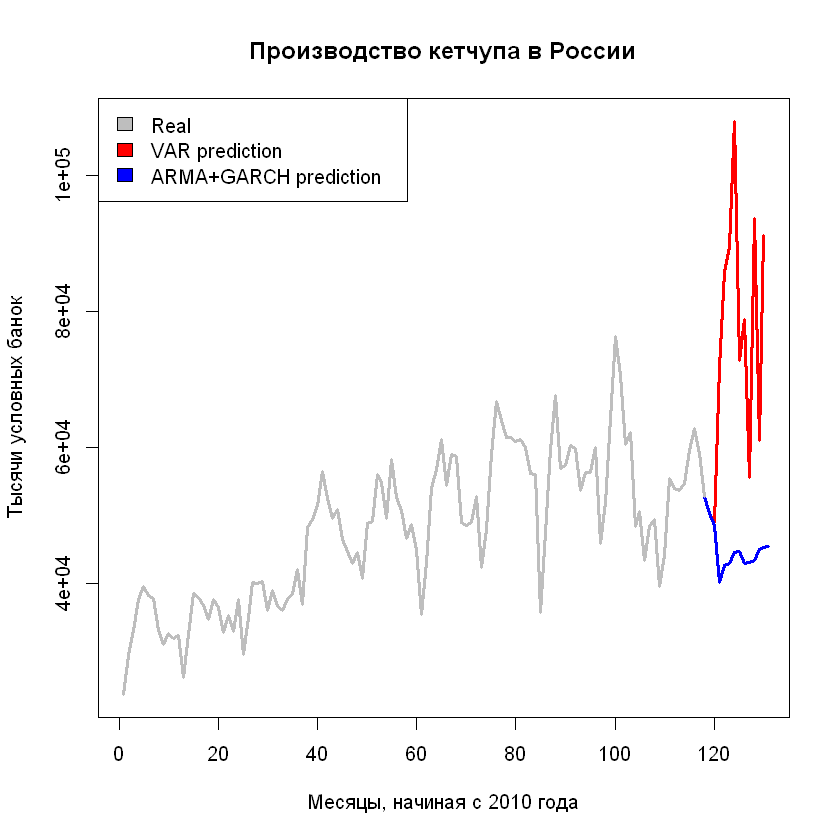

In [93]:
plot(as.ts(total_prod), t='l', col = 'red', lwd = 3, main = 'Производство кетчупа в России',
     ylab = 'Тысячи условных банок', xlab = 'Месяцы, начиная с 2010 года')
lines(as.ts(new_total_prod), col = 'blue', lwd = 3)
lines(as.ts(new_total_prod[1:118,]), col = 'grey', lwd = 3)
legend(fill = c('grey', 'red', 'blue'), legend = c('Real', 'VAR prediction', 'ARMA+GARCH prediction'), 'topleft')

#### Уже больше похоже на правду, но все равно модель также предназначена для краткосрочных прогнозов. Включих в модель фактор потребительской сезонности (то есть само потребление) результат не сильно изменится, ведь эти данные уже имеют это "в памяти". Интересно заметит, что краткосрочные прогнозы VAR и ARMA+GARCH совпадают (синий накладывается на красный), что и делает эти модели хорошими для предсказания 